In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json
import pandas_profiling
from numpy import array

import quandl
quandl_api = 'YDy5xD85FUyhACHzsunX'
quandl.ApiConfig.api_key = 'YDy5xD85FUyhACHzsunX'


import eia
api = eia.API('aeb9ba252acba96a087cdd98626d5fc2')

pd.set_option('display.max_rows', 5000)

# Importing Data from Quandl and Energy Information Administration #

##### Quandl: ### 

<a href="https://www.quandl.com/data/UICT-United-Nations-Information-and-Communication-Technology?keyword=internet%20use" target="_blank">*Percent of Population Connected to Internet*</a>


##### Energy Information Administration: ###

<a href="https://www.eia.gov/international/data/world/total-energy/total-energy-consumption?pd=44&p=0000000010000000000000000000000000000000000000000000000000u06&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1514764800000" target="_blank">*Total Electricity Consumption*</a>


<a href="https://www.eia.gov/international/data/world/total-energy/total-energy-consumption?pd=44&p=0000000010000000000000000000000000000000000000000000000000u06&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1514764800000" target="_blank">*Total Energy Consumption*</a>


<a href="https://www.eia.gov/international/data/world/other-statistics/population-by-country?pd=4702&p=000000000000000000000000000000000000000000000000000000001&u=0&f=A&v=mapbubble&a=-&i=none&vo=value&t=C&g=00000000000000000000000000000000000000000000000001&l=249-ruvvvvvfvtvnvv1vrvvvvfvvvvvvfvvvou20evvvvvvvvvvnvvvs0008&s=315532800000&e=1546300800000&" target="_blank">*Total Population*</a>


<a href="https://www.eia.gov/opendata/qb.php?category=2631063" target="_blank">*GDP*</a>

## Generating Country Codes for API calls  #

In [2]:
#Manually entered country codes from Quandl dataset as a list. 
q_country_codes = ['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 
'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'PRK', 'DNK', 
'COD', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB',
'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MYS', 'MDV', 'MLT', 'MHL', 'MWI', 'MRT', 'MLI', 'MUS', 'MEX', 'FSM', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU',
'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'KOR', 'MDA', 'ROU', 'RUS', 'RWA',
'KNA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SVK', 'SVN', 'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'SDN', 'SUR', 'SWZ', 'SWE', 
'CHE', 'SYR', 'TJK', 'THA', 'MKD', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TUV', 'UGA', 'UKR', 'ARE', 'GBR', 'TZA', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM',
'YEM', 'ZMB', 'ZWE']


#Manually entered country codes from EIA dataset as a list.
eia_country_codes = ['AFG','ALB','DZA','ASM','AGO','ATA','ATG','ARG','ARM','ABW','AUS','AUT','AZE','BHR',
 'BGD','BRB','BLR','BEL','BLZ','BEN','BMU','BTN','BOL','BIH','BWA','BRA','VGB','BRN','BGR','BFA','MMR','BDI','CPV',
 'KHM','CMR','CAN','CYM','CAF','TCD','CHL','CHN','COL','COM','COG','COD','COK','CRI','HRV','CUB','CYP','CZE','CIV',
 'DNK','DJI','DMA','DOM','ECU','EGY','SLV','GNQ','ERI','EST','SWZ','ETH','FLK','FRO','FJI','FIN','CSK','SCG','SUN',
 'YUG','FRA','GUF','PYF','GAB','GMB','GEO','DEU','DDR','DEU','GHA','GIB','GRC','GRL','GRD','GLP','GUM','GTM','GIN',
 'GNB','GUY','HTI','HIT','HND','HKG','HUN','ISL','IND','IDN','IRN','IRQ','IRL','ISR','ITA','JAM','JPN','JOR','KAZ',
 'KEN','KIR','XKS', 'KWT','KGZ','LAO','LVA','LBN','LSO','LBR','LBY','LTU','LUX','MAC','MDG','MWI','MYS''MDV','MLI',
 'MLT','MTQ','MRT','MUS','MEX','MDA','MNG','MNE','MSR','MAR','MOZ','NAM','NRU''NPL','NLD','NLD','NCL','NZL','NIC',
 'NER','NGA','NIU','PRK','MKD','NOR','OMN','PAK','PSE','PAN','PNG','PRY','PER','PHL','POL','PRT','PRI','QAT','REU',
 'ROU','RUS','RWA','SHN','KNA','LCA','SPM','VCT','WSM','STP','SAU','SEN','SRB','SYC','SLE','SGP','SVK','SVN','SLB',
 'SOM','ZAF','KOR','SSD','ESP','LKA','SDN','SUR','SWE','CHE','SYR','TWN','TJK','TZA','THA','BHS','TLS','TGO','TON',
 'TTO','TUN','TUR','TKM','TCA','USI','VIR','UGA','UKR','ARE','GBR','USA','URY','UZB','VUT','VEN','VNM','WAK','ESH',
 'YEM','ZMB','ZWE','ZMB','ZWE']


#Do the two country_code lists have the same number of values?
print('q_country_codes:' + str(len(q_country_codes)))
print('eia_country_codes:' + str(len(eia_country_codes)))

q_country_codes:195
eia_country_codes:226


In [3]:
#Determining which codes are in q_country_codes that are not in eia_country_codes.
test_list1 = np.setdiff1d(q_country_codes, eia_country_codes)
print(test_list1)
print('Codes in q_country_codes that are not in eia_country_codes: ' + str(len(test_list1)) + '\n')


#Determining which codes are in eia_country_codes that are not in country_codes.
test_list2 = np.setdiff1d(eia_country_codes, q_country_codes)
print(test_list2)
print('Codes in eia_country_codes that are not in q_country_codes: ' + str(len(test_list2)) + '\n')

#Convert the lists to a list dtype and then combine to create list of country codes to remove.
test_list1 = test_list1.tolist()
test_list2 = test_list2.tolist()
remove_list = test_list1 + test_list2
print(remove_list)
print('Total country codes to remove: ' + str(len(remove_list)))

['AND' 'FSM' 'MCO' 'MDV' 'MHL' 'MYS' 'NPL' 'NRU' 'PLW' 'SMR' 'TUV']
Codes in q_country_codes that are not in eia_country_codes: 11

['ABW' 'ASM' 'ATA' 'BMU' 'CSK' 'CYM' 'DDR' 'ESH' 'FLK' 'FRO' 'GIB' 'GLP'
 'GRL' 'GUF' 'GUM' 'HIT' 'MAC' 'MSR' 'MTQ' 'MYSMDV' 'NCL' 'NRUNPL' 'PRI'
 'PSE' 'PYF' 'REU' 'SCG' 'SHN' 'SPM' 'SUN' 'TCA' 'TWN' 'USI' 'VGB' 'VIR'
 'WAK' 'XKS' 'YUG']
Codes in eia_country_codes that are not in q_country_codes: 38

['AND', 'FSM', 'MCO', 'MDV', 'MHL', 'MYS', 'NPL', 'NRU', 'PLW', 'SMR', 'TUV', 'ABW', 'ASM', 'ATA', 'BMU', 'CSK', 'CYM', 'DDR', 'ESH', 'FLK', 'FRO', 'GIB', 'GLP', 'GRL', 'GUF', 'GUM', 'HIT', 'MAC', 'MSR', 'MTQ', 'MYSMDV', 'NCL', 'NRUNPL', 'PRI', 'PSE', 'PYF', 'REU', 'SCG', 'SHN', 'SPM', 'SUN', 'TCA', 'TWN', 'USI', 'VGB', 'VIR', 'WAK', 'XKS', 'YUG']
Total country codes to remove: 49


In [4]:
final_country_codes = q_country_codes

for element in remove_list:
    if element in final_country_codes:
        final_country_codes.remove(element)

print(final_country_codes)
print(len(final_country_codes))

['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'PRK', 'DNK', 'COD', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MLT', 'MWI', 'MRT', 'MLI', 'MUS', 'MEX', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NOR', 'OMN', 'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'KOR', 'MDA', 'ROU', 'RUS', 'RWA', 'KNA', 'LCA', 'VCT', 'WSM', 'STP', 'SAU', 'SEN', 'SRB'

## Quandl Data Import  #

### Internet Connectivity  (% of population using internet)

In [5]:

#Created a for loop to append country codes with the Quandl database code 'UICT/INT_'.
q_appended_country_codes = []

for country in final_country_codes:
    q_appended_country_codes.append('UICT/INT_' + str(country))
    
    
#Imported data for each country into one dataframe.
internet_df = quandl.get(q_appended_country_codes, authtoken= "YDy5xD85FUyhACHzsunX")


#Changed column names.
internet_column_names = final_country_codes
internet_df.columns = internet_column_names


#Dropped rows so that dataframe starts at 1990.
internet_df = internet_df.drop(internet_df.index[0:18])


#Set internet_df index as the year.
internet_df = internet_df.set_index(pd.DatetimeIndex(internet_df.index).year)


#Fill all NaN values with the last value.
internet_df = internet_df.fillna(method = 'ffill')

In [6]:
#Transposed the dataframe, stacked the dataframe into a multi index, and renamed the indexes.
internet_multi = internet_df.transpose()
internet_multi = internet_multi.stack().rename_axis(['Country', 'Date'])

In [7]:
#Converted it back to a pandas dataframe and renamed the values column.
internet_multi = pd.DataFrame(internet_multi)
internet_multi = internet_multi.rename(columns={0 : 'int_perc'})

#Saved as the final dataframe. 
internet_df = internet_multi

In [8]:
internet_df.loc['USA']

,int_perc
Date,
1990,0.784729
1991,1.163194
1992,1.724203
1993,2.271673
1994,4.862781
1995,9.237088
1996,16.419353
1997,21.616401
1998,30.093197


## Energy Information Administration Data Import

### Electricity Consumption Data (in billion kilowatthours)


In [9]:
#Created a for loop to append country codes with EIA API call code
eia_appended_country_codes = []

for country in final_country_codes:
    eia_appended_country_codes.append('INTL.2-2-' + str(country) + '-BKWH.A')

In [10]:
#Imported data for each country into one dataframe.
electricity_df = []

for i in range(len(eia_appended_country_codes)):
    
        url = 'http://api.eia.gov/series/?api_key=aeb9ba252acba96a087cdd98626d5fc2&series_id=' + eia_appended_country_codes[i]

        r = requests.get(url)
        json_data = r.json()

        df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', eia_appended_country_codes[i]])

        df.set_index('Date', drop=True, inplace = True)
        df.sort_index(ascending=True)

        electricity_df.append(df)
        
electricity_df = pd.concat(electricity_df, axis=1)

In [11]:
#Reversing the index order so it starts with 1980.
electricity_df = electricity_df.loc[::-1]

#Changed column names
electricity_df.columns = final_country_codes

#Dropped rows so that dataframe starts at 1990 and ends at 2014.
electricity_df = electricity_df.drop(electricity_df.index[0:11])
electricity_df = electricity_df.drop(electricity_df.index[-4::])

#Changing 'Date' index to datetime object.
electricity_df = electricity_df.set_index(pd.DatetimeIndex(electricity_df.index).year)

#Changing all '--' values to a NaN value.
electricity_df = electricity_df.replace(['--'], np.nan)

#Fill all NaN values with the last value.
electricity_df = electricity_df.fillna(method = 'ffill')

#Fill remaining NaN values in the beginning of the time series with the minimum values.
electricity_df = electricity_df.fillna(value = electricity_df.min())

In [12]:
#Transposed the dataframe, stacked the dataframe into a multi index, and renamed the indexes.
electricity_multi = electricity_df.transpose()
electricity_multi = electricity_multi.rename_axis('Country')
electricity_multi = electricity_multi.stack().rename_axis(['Country', 'Date'])

#Converted it back to a pandas dataframe and renamed the values column.
electricity_multi = pd.DataFrame(electricity_multi)
electricity_multi = electricity_multi.rename(columns={0 : 'electricity_consumed'})

#Saved as the final dataframe. 
electricity_df = electricity_multi

In [13]:
electricity_df.loc['USA']

,electricity_consumed
Date,
1989,2755.664478
1990,2837.116986
1991,2886.097489
1992,2897.247672
1993,3000.745154
1994,3080.938525
1995,3164.020666
1996,3253.831146
1997,3301.923343


### Population Data (in thousands)

In [14]:
#Created a for loop to append country codes with EIA API call code
eia_pop_appended_country_codes = []

for country in final_country_codes:
    eia_pop_appended_country_codes.append('INTL.4702-33-' + str(country) + '-THP.A')

In [15]:
#Imported data for each country into one dataframe.
population_df = []

for i in range(len(eia_pop_appended_country_codes)):
    
        url = 'http://api.eia.gov/series/?api_key=aeb9ba252acba96a087cdd98626d5fc2&series_id=' + eia_pop_appended_country_codes[i]

        r = requests.get(url)
        json_data = r.json()

        df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', eia_pop_appended_country_codes[i]])

        df.set_index('Date', drop=True, inplace = True)
        df.sort_index(ascending=True)

        population_df.append(df)
        
population_df = pd.concat(population_df, axis=1)


In [16]:
#Reversing the index order so it starts with 1980.
population_df = population_df.loc[::-1]

#Simplifying column names
population_df.columns = final_country_codes

#Dropped rows so that dataframe starts at 1990 and ends at 2014.
population_df = population_df.drop(population_df.index[0:10])
population_df = population_df.drop(population_df.index[-5::])

#Changing 'Date' index to datetime object.
population_df = population_df.set_index(pd.DatetimeIndex(population_df.index).year)

#Changing all '--' values to a NaN value.
population_df = population_df.replace(['--'], np.nan)

#Fill all NaN values with the last value.
population_df = population_df.fillna(method = 'ffill')


In [17]:
#Transposed the dataframe, stacked the dataframe into a multi index, and renamed the indexes.
population_multi = population_df.transpose()
population_multi = population_multi.rename_axis('Country')
population_multi = population_multi.stack().rename_axis(['Country', 'Date'])

#Converted it back to a pandas dataframe and renamed the values column.
population_multi = pd.DataFrame(population_multi)
population_multi = population_multi.rename(columns={0 : 'population'})

#Saved as the final dataframe. 
population_df = population_multi

In [18]:
population_df.loc['USA']

,population
Date,
1990,249517
1991,252831
1992,256391
1993,259810
1994,263018
1995,266179
1996,269310
1997,272559
1998,275762


### Energy Consumption (million BTU per person)

In [19]:
#Created a for loop to append country codes with EIA API call code
eia_energy_appended_country_codes = []

for country in final_country_codes:
    eia_energy_appended_country_codes.append('INTL.47-33-' + str(country) + '-MBTUPP.A')


In [20]:
#Imported data for each country into one dataframe.
energy_consumed_df = []

for i in range(len(eia_energy_appended_country_codes)):
    
        url = 'http://api.eia.gov/series/?api_key=aeb9ba252acba96a087cdd98626d5fc2&series_id=' + eia_energy_appended_country_codes[i]

        r = requests.get(url)
        json_data = r.json()

        df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', eia_energy_appended_country_codes[i]])

        df.set_index('Date', drop=True, inplace = True)
        df.sort_index(ascending=True)

        energy_consumed_df.append(df)
        
energy_consumed_df = pd.concat(energy_consumed_df, axis=1)



In [21]:
#Reversing the index order so it starts with 1980.
energy_consumed_df = energy_consumed_df.loc[::-1]


#Simplifying column names
energy_consumed_df.columns = final_country_codes


#Dropped rows so that dataframe starts at 1990 and ends at 2014.
energy_consumed_df = energy_consumed_df.drop(energy_consumed_df.index[0:10])
energy_consumed_df = energy_consumed_df.drop(energy_consumed_df.index[-4::])


#Changing 'Date' index to datetime object.
energy_consumed_df = energy_consumed_df.set_index(pd.DatetimeIndex(energy_consumed_df.index).year)


#Changing all '--' values to a NaN value.
energy_consumed_df = energy_consumed_df.replace(['--'], np.nan)


#Fill all NaN values with the last value.
energy_consumed_df = energy_consumed_df.fillna(method = 'ffill')


#Fill remaining NaN values in the beginning of the time series with the minimum values.
energy_consumed_df = energy_consumed_df.fillna(value = energy_consumed_df.min())

In [22]:
#Transposed the dataframe, stacked the dataframe into a multi index, and renamed the indexes.
energy_consumed_multi = energy_consumed_df.transpose()
energy_consumed_multi = energy_consumed_multi.rename_axis('Country')
energy_consumed_multi = energy_consumed_multi.stack().rename_axis(['Country', 'Date'])

#Converted it back to a pandas dataframe and renamed the values column.
energy_consumed_multi = pd.DataFrame(energy_consumed_multi)
energy_consumed_multi = energy_consumed_multi.rename(columns={0 : 'energy_consumed'})

#Saved as the final dataframe. 
energy_consumed_df = energy_consumed_multi

In [23]:
energy_consumed_df.loc['USA']

,energy_consumed
Date,
1989,343.403
1990,338.385
1991,333.742
1992,334.352
1993,335.884
1994,338.316
1995,341.615
1996,348.796
1997,346.739


### GDP (in billons)

In [24]:
#Created a for loop to append country codes with EIA API call code
eia_gdp_appended_country_codes = []

for country in final_country_codes:
    eia_gdp_appended_country_codes.append('INTL.4701-34-' + str(country) + '-BDOLPPP.A')

In [25]:
#Imported data for each country into one dataframe.
gdp_df = []

for i in range(len(eia_gdp_appended_country_codes)):
    
        url = 'http://api.eia.gov/series/?api_key=aeb9ba252acba96a087cdd98626d5fc2&series_id=' + eia_gdp_appended_country_codes[i]

        r = requests.get(url)
        json_data = r.json()

        df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', eia_gdp_appended_country_codes[i]])

        df.set_index('Date', drop=True, inplace = True)
        df.sort_index(ascending=True)

        gdp_df.append(df)
        
gdp_df = pd.concat(gdp_df, axis=1)


In [26]:
#Reversing the index order so it starts with 1980.
gdp_df = gdp_df.loc[::-1]

#Simplifying column names
gdp_df.columns = final_country_codes

#Dropped rows so that dataframe starts at 1990 and ends at 2014.
gdp_df = gdp_df.drop(gdp_df.index[0:10])
gdp_df = gdp_df.drop(gdp_df.index[-5::])


#Changing 'Date' index to datetime object.
gdp_df = gdp_df.set_index(pd.DatetimeIndex(gdp_df.index).year)


#Changing all '--' values to a NaN value.
gdp_df = gdp_df.replace(['--'], np.nan)


#Fill all NaN values with the last value.
gdp_df = gdp_df.fillna(method = 'ffill')


#Fill remaining NaN values in the beginning of the time series with the minimum values.
gdp_df = gdp_df.fillna(value = gdp_df.min())

In [27]:
#Transposed the dataframe, stacked the dataframe into a multi index, and renamed the indexes.
gdp_multi = gdp_df.transpose()
gdp_multi = gdp_multi.rename_axis('Country')
gdp_multi = gdp_multi.stack().rename_axis(['Country', 'Date'])

#Converted it back to a pandas dataframe and renamed the values column.
gdp_multi = pd.DataFrame(gdp_multi)
gdp_multi = gdp_multi.rename(columns={0 : 'GDP'})

#Saved as the final dataframe. 
gdp_df = gdp_multi

In [28]:
gdp_df.loc['USA']

,GDP
Date,
1990,9798.6
1991,9787.97
1992,10132.7
1993,10411.7
1994,10831.2
1995,11121.9
1996,11541.5
1997,12054.7
1998,12595


### Continents

In [41]:
continent_list = pd.read_csv('country-and-continent-codes-list.csv')

In [42]:
continent_list

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
5,Europe,EU,"Andorra, Principality of",AD,AND,20.0
6,Africa,AF,"Angola, Republic of",AO,AGO,24.0
7,North America,NaN,Antigua and Barbuda,AG,ATG,28.0
8,Europe,EU,"Azerbaijan, Republic of",AZ,AZE,31.0
9,Asia,AS,"Azerbaijan, Republic of",AZ,AZE,31.0


In [43]:
#Reformating dataframe for easier manipulation
continent_list.columns = [x.lower() for x in continent_list.columns]
continent_list.drop(['country_number', 'two_letter_country_code', 'continent_code'], axis = 1, inplace = True)


In [44]:
continent_list.columns = ['continent','country_name', 'Country']
continent_list.dropna(axis = 0, inplace = True)

#Removing duplicates. Some countries were listed as being in 'Asia' and 'Europe', removed the ones in 'Asia'.
continent_list.drop_duplicates(subset = 'Country', keep = 'first', inplace = True)

#Setting the index
continent_list.set_index('Country')

#Simplifying the 'country_name' column.
continent_list['country_name'] = continent_list['country_name'].str.split(',').str[0]

#The United Kingdom has a complicated and long name, simplifying to 'United Kingdom'
continent_list.country_name[continent_list.Country == 'GBR'] = 'United Kingdom'

In [45]:
continent_list.country_name[continent_list.Country == 'GBR']

243    United Kingdom
Name: country_name, dtype: object

### Merging internet percentage, electricity consumed, energy consumed, population, gdp, and continent dataframes into one.

In [46]:
df = pd.merge(internet_df, electricity_df, how = 'inner', on = ['Country', 'Date'])
df = pd.merge(df, energy_consumed_df, how = 'inner', on = ['Country', 'Date'])
df = pd.merge(df, population_df, how = 'inner', on = ['Country' , 'Date'])
df = pd.merge(df, gdp_df, how = 'inner', on = ['Country' , 'Date'])

In [47]:
df = df.reset_index(level=1)\
             .merge(continent_list, on='Country', how='left')\
             .set_index(['Country', 'Date'])

In [48]:
df.head(250)

int_perc  electricity_consumed energy_consumed population  \
Country Date                                                               
AFG     1990   0.000000              1.021140         8.72685    12412.3   
        1991   0.000000              1.044770         3.56705      13299   
        1992   0.000000              0.768050         2.15952    14485.5   
        1993   0.000000              0.729610         1.96431    15816.6   
        1994   0.000000              0.750170         1.76163    17075.7   
        1995   0.000000              0.685440         1.39964    18110.7   
        1996   0.000000              0.620570         1.31861    18853.4   
        1997   0.000000              0.564070         1.22298    19357.1   
        1998   0.000000              0.527800         1.16728    19737.8   
        1999   0.000000              0.523150         1.14162    20170.8   
        2000   0.000000              0.534310        0.971033      20780   
        2001   0.004723              0.650560        0.736543      21607   
        2002   0.004561              0.738910        0.668539    22600.8   
        2003   0.087891              0.973270        0.750363    23680.9   
        2004   0.105809              0.931420        0.663803    24726.7   
        2005   1.224148              0.973620        0.818419    25654.3   
        2006   2.107124              1.210410        0.999818    26433.1   
        2007   1.900000              1.488780         1.26399    27100.5   
        2008   1.840000              1.429049         2.11117    27722.3   
        2009   3.550000              2.027433         3.35797    28394.8   
        2010   4.000000              2.442759         4.06156    29185.5   
        2011   5.000000              3.033989         5.34743    30117.4   
        2012   5.454545              3.919160         4.73687    31161.4   
        2013   5.900000              4.640790         3.85825    32269.6   
        2014   6.390000              4.783220         3.42556    33370.8   
ALB     1990   0.000000              1.659000         34.9491    3286.07   
        1991   0.000000              1.715000         29.3634     3280.4   
        1992   0.000000              1.443000         25.9378    3245.89   
        1993   0.000000              1.727000         23.1076     3195.2   
        1994   0.000000              2.017000         22.3034    3146.52   
        1995   0.011169              2.152000         24.9122    3112.92   
        1996   0.032197              2.790000         27.5414     3098.7   
        1997   0.048594              2.084000         25.1461    3099.75   
        1998   0.065027              2.200000         26.9529     3110.7   
        1999   0.081437              3.482000         24.1638     3122.7   
        2000   0.114097              3.758360         31.3293    3129.25   
        2001   0.325798              3.548780         29.6908     3129.7   
        2002   0.390081              4.545560         32.1957    3126.18   
        2003   0.971900              4.110580         36.4085    3118.02   
        2004   2.420388              3.777600         38.6971    3104.89   
        2005   6.043891              3.738800         38.7039    3086.81   
        2006   9.609991              2.991420          36.725    3063.02   
        2007  15.036115              3.693680         31.9135    3033.99   
        2008  23.860000              4.053000         35.2168    3002.68   
        2009  41.200000              4.302000         38.7048    2973.04   
        2010  45.000000              4.424770         42.9287    2948.03   
        2011  49.000000              5.141940         36.3336     2928.6   
        2012  54.655959              4.322650         35.6823    2914.09   
        2013  57.200000              4.482410         43.7597    2903.79   
        2014  60.100000              4.856760          40.002    2896.31   
DZA     1990   0.000000             12.734000          47.272  

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4384 entries, ('AFG', 1990) to ('ZWE', 2014)
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   int_perc              4384 non-null   float64
 1   electricity_consumed  4384 non-null   float64
 2   energy_consumed       4384 non-null   object 
 3   population            4384 non-null   object 
 4   GDP                   4384 non-null   object 
 5   continent             4384 non-null   object 
 6   country_name          4384 non-null   object 
dtypes: float64(2), object(5)
memory usage: 259.9+ KB


In [50]:
usa = df.loc['USA']

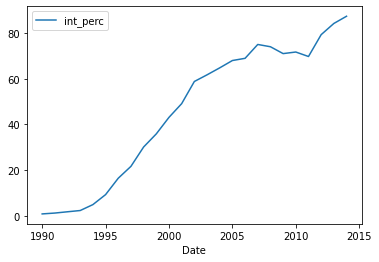

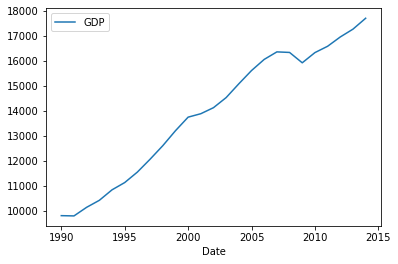

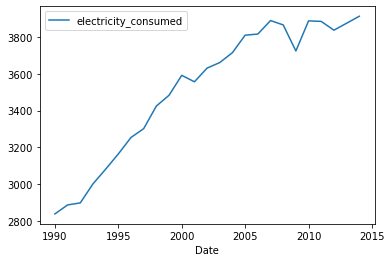

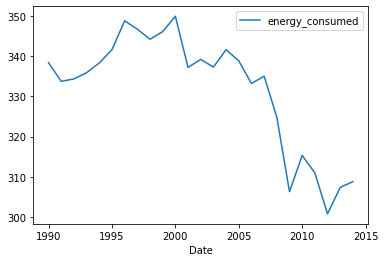

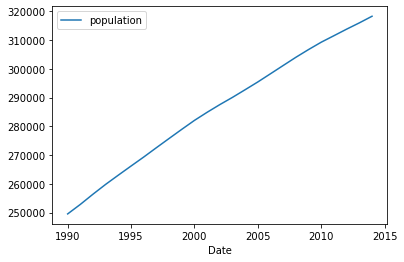

In [51]:
usa[['int_perc']].plot()
plt.show()

usa[['GDP']].plot()
plt.show()

usa[['electricity_consumed']].plot()
plt.show()

usa[['energy_consumed']].plot()
plt.show()

usa[['population']].plot()
plt.show()

In [52]:
df_2014 = df.loc[slice(None), 2014, :]
top20_names = list(df_2014.nlargest(20,'int_perc').index)
top20 = df.loc[(top20_names), ['int_perc', 'electricity_consumed', 'population', 'GDP','continent','country_name']]

In [53]:
top20

int_perc  electricity_consumed population      GDP  \
Country Date                                                        
ISL     1990   0.000000              4.073000    255.044  8.29478   
        1991   0.505129              4.065000    257.616  8.27624   
        1992   1.539160              4.160000    260.155  7.99701   
        1993   2.667825              4.369000     262.65  8.10205   
        1994   6.794812              4.495000     265.14  8.39444   
        1995  11.215876              4.605000    267.627  8.43685   
        1996  14.806479              4.619700    270.144  8.82217   
        1997  27.478869              5.087690    272.709  9.33135   
        1998  36.264207              5.787000    275.294  10.0184   
        1999  41.294567              6.742000    277.868  10.4226   
        2000  44.470534              7.303700    280.439  10.9422   
        2001  49.392995              7.613760     282.91  11.3814   
        2002  79.120000              7.950640    285.329  11.4451   
        2003  83.140000              7.938640    287.955  11.6903   
        2004  83.880000              8.169760    291.102  12.6024   
        2005  87.000000              8.234700    294.976  13.3742   
        2006  89.510000              9.443760    299.727  14.2191   
        2007  90.600000             11.397880    305.181  15.4213   
        2008  91.000000             15.766880    310.855   15.762   
        2009  93.000000             16.202880    316.057   14.554   
        2010  93.390000             16.046880    320.342  14.1418   
        2011  94.819687             16.347880    323.471  14.4028   
        2012  96.209800             16.809820    325.642   14.556   
        2013  96.546800             17.625700    327.194  15.2186   
        2014  98.160000             17.304820    328.592  15.4754   
NOR     1990   0.707299             97.448000    4243.56  171.404   
        1991   1.407395             99.716000     4264.7  176.708   
        1992   2.216366            100.218850    4289.59  183.045   
        1993   2.783991            101.586000    4315.19   188.18   
        1994   4.152450            102.558000    4339.56    197.6   
        1995   6.423220            104.516000    4361.88  205.944   
        1996  18.250311            103.945000    4384.18  216.342   
        1997  20.417881            104.129000    4408.27  227.721   
        1998  22.560113            110.537000    4434.93  233.756   
        1999  40.000000            110.449000    4466.06  238.401   
        2000  52.000000            112.976480    4494.09  246.068   
        2001  64.000000            115.491420    4516.33  251.061   
        2002  72.840000            109.593820    4541.68  254.241   
        2003  78.130000            103.759400    4568.01  256.741   
        2004  77.690000            109.153520    4595.52  266.954   
        2005  81.990000            113.351200    4627.52  274.214   
        2006  82.550000            110.463780    4665.79  280.912   
        2007  86.930000            113.954840    4716.15  289.125   
        2008  90.570000            115.652640    4775.97  289.715   
        2009  92.080000            112.506280     4836.1  286.001   
        2010  93.390000            120.145140    4897.02  287.223   
        2011  93.489983            114.557440    4961.28   290.52   
        2012  94.649978            118.402900    5026.74  297.963   
        2013  95.053400            119.204720    5086.71  301.181   
        2014  96.300000            116.674780    5144.55  307.639   
DNK     1990   0.097277             28.868000    5142.32   186.23   
        1991   0.194057             29.920000    5156.26  188.661   
        1992   0.386914             30.492000    5173.68  192.353   
        1993   0.578330             30.788000    5190.63  192.374   
        1994   1.344308             31.391000    5208.56  202.632   
        1995   3.825656             31.453000    5237.78  208.767   
        1996 

In [54]:
df.to_csv('internet_electricity_data.csv')